# Proyecto 2 Analítica Computacional.

###### Jairo Gordillo
###### Mateo Carreño
###### Santiago Ramirez

## Cargar datos

In [164]:
import pandas as pd
import numpy as np

ruta_csv = 'Resultados__nicos_Saber_11_20250524.csv'
df = pd.read_csv(ruta_csv)

print(f"Datos cargados con {df.shape[0]} filas y {df.shape[1]} columnas.")

Datos cargados con 32348 filas y 51 columnas.


## Selección de Variables Relevantes

In [165]:
# --- Paso 2: Selección de variables relevantes ---
variables_seleccionadas = [
    'ESTU_GENERO',            # Sexo
    'ESTU_FECHANACIMIENTO',  # Fecha de nacimiento para calcular edad
    'COLE_AREA_UBICACION',   # Área (rural/urbana)
    'FAMI_ESTRATOVIVIENDA',  # Estrato socioeconómico
    'COLE_CARACTER',         # Tipo de institución (pública/privada)
    'FAMI_EDUCACIONMADRE',   # Nivel educativo madre
    'FAMI_EDUCACIONPADRE',   # Nivel educativo padre
    'COLE_JORNADA',          # Jornada escolar
    'ESTU_DEPTO_RESIDE',     # Departamento de residencia
    'FAMI_TIENEINTERNET',    # Internet en el hogar
    'PUNT_MATEMATICAS',
    'PUNT_LECTURA_CRITICA',
    'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES',
    'PUNT_GLOBAL'
]

df_sub = df[variables_seleccionadas].copy()
print(df_sub)

      ESTU_GENERO ESTU_FECHANACIMIENTO COLE_AREA_UBICACION  \
0               M           25/03/1998              URBANO   
1               M           25/03/1998              URBANO   
2               F           21/11/1998              URBANO   
3               M           24/01/2000              URBANO   
4               M           24/01/2000              URBANO   
...           ...                  ...                 ...   
32343           M           26/02/2001              URBANO   
32344           M           26/02/2001              URBANO   
32345           F           26/08/2000              URBANO   
32346           F           12/12/2001              URBANO   
32347           F           12/12/2001              URBANO   

      FAMI_ESTRATOVIVIENDA COLE_CARACTER                 FAMI_EDUCACIONMADRE  \
0                Estrato 5     ACADÉMICO      Educación profesional completa   
1                Estrato 5     ACADÉMICO      Educación profesional completa   
2              

In [166]:
# --- Paso 3: Cálculo de edad (considerando el año 2018) ---
df_sub['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df_sub['ESTU_FECHANACIMIENTO'], errors='coerce')

# Extraer el año de nacimiento
df_sub['AÑO_NACIMIENTO'] = df_sub['ESTU_FECHANACIMIENTO'].dt.year

# Usar 2018 como el año del examen
AÑO_PRUEBA = 2018
df_sub = df_sub.dropna(subset=['AÑO_NACIMIENTO'])
# Calcular la edad en 2018
df_sub['EDAD'] = (AÑO_PRUEBA - df_sub['AÑO_NACIMIENTO']).round(0).astype('int64')



C:\Users\gordi\AppData\Local\Temp\ipykernel_10912\1079311910.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sub['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df_sub['ESTU_FECHANACIMIENTO'], errors='coerce')


In [167]:
# --- Paso 4: Detectar y eliminar outliers con el criterio de IQR (Prueba de Tukey) ---
# Definir una función para eliminar outliers usando el rango intercuartil (IQR)
def eliminar_outliers(df, columnas):
    for col in columnas:
        if df[col].dtype in ['int64', 'float64']:  # Solo procesar columnas numéricas
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            # Definir los límites inferior y superior
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR
            # Eliminar filas fuera de los límites
            df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    return df

# Seleccionar las columnas numéricas para eliminar outliers
columnas_numéricas = ['EDAD', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 
                      'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']

# Eliminar outliers
df_sub_clean = eliminar_outliers(df_sub, columnas_numéricas)


In [168]:
# --- Paso 5: Manejo de valores faltantes ---
# Imputar valores faltantes para columnas numéricas con la mediana
num_vars = ['EDAD', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES',
            'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']

# Imputar numéricas con mediana
for var in num_vars:
    mediana = df_sub_clean[var].median()
    df_sub_clean[var].fillna(mediana, inplace=True)

# Variables categóricas
cat_vars = ['ESTU_GENERO', 'COLE_AREA_UBICACION', 'COLE_CARACTER', 'COLE_JORNADA',
            'ESTU_DEPTO_RESIDE', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONMADRE', 
            'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA']

# Imputar categóricas con moda
for var in cat_vars:
    modo = df_sub_clean[var].mode()[0]
    df_sub_clean[var].fillna(modo, inplace=True)
print(df_sub_clean)


      ESTU_GENERO ESTU_FECHANACIMIENTO COLE_AREA_UBICACION  \
0               M           1998-03-25              URBANO   
1               M           1998-03-25              URBANO   
2               F           1998-11-21              URBANO   
3               M           2000-01-24              URBANO   
4               M           2000-01-24              URBANO   
...           ...                  ...                 ...   
32343           M           2001-02-26              URBANO   
32344           M           2001-02-26              URBANO   
32345           F           2000-08-26              URBANO   
32346           F           2001-12-12              URBANO   
32347           F           2001-12-12              URBANO   

      FAMI_ESTRATOVIVIENDA COLE_CARACTER                 FAMI_EDUCACIONMADRE  \
0                Estrato 5     ACADÉMICO      Educación profesional completa   
1                Estrato 5     ACADÉMICO      Educación profesional completa   
2              

C:\Users\gordi\AppData\Local\Temp\ipykernel_10912\2377276462.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sub_clean[var].fillna(mediana, inplace=True)
C:\Users\gordi\AppData\Local\Temp\ipykernel_10912\2377276462.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [169]:
# --- Paso 6: Codificación de variables categóricas (One-Hot Encoding) ---
df_final = pd.get_dummies(df_sub_clean, columns=cat_vars, drop_first=True)
print(df_final)


      ESTU_FECHANACIMIENTO  PUNT_MATEMATICAS  PUNT_LECTURA_CRITICA  \
0               1998-03-25                34                    44   
1               1998-03-25                34                    44   
2               1998-11-21                47                    58   
3               2000-01-24                79                    71   
4               2000-01-24                79                    71   
...                    ...               ...                   ...   
32343           2001-02-26                62                    70   
32344           2001-02-26                62                    70   
32345           2000-08-26                24                    41   
32346           2001-12-12                46                    55   
32347           2001-12-12                46                    55   

       PUNT_C_NATURALES  PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  \
0                    41                        32           52          194   
1

In [170]:
# --- Paso 7: Creación de la variable objetivo (alcanzó acceso a educación superior) ---
umbral_acceso = 250
df_final['alcanzó_acceso'] = (df_final['PUNT_GLOBAL'] >= umbral_acceso).astype(int)
print(df_final.head())

  ESTU_FECHANACIMIENTO  PUNT_MATEMATICAS  PUNT_LECTURA_CRITICA  \
0           1998-03-25                34                    44   
1           1998-03-25                34                    44   
2           1998-11-21                47                    58   
3           2000-01-24                79                    71   
4           2000-01-24                79                    71   

   PUNT_C_NATURALES  PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  \
0                41                        32           52          194   
1                41                        32           52          194   
2                52                        46           47          252   
3                77                        74           87          381   
4                77                        74           87          381   

   AÑO_NACIMIENTO  EDAD  ESTU_GENERO_M  ...  \
0          1998.0    20           True  ...   
1          1998.0    20           True  ...   
2          

In [171]:
# --- Paso 8: Guardar el dataset limpio ---
df_final.to_csv('Resultados_Saber11_limpio.csv', index=False)

# --- Verificación ---
print("Datos limpios guardados correctamente.")


Datos limpios guardados correctamente.


## otros

Valores faltantes por variable antes de imputación:
ESTU_FECHANACIMIENTO                0
PUNT_MATEMATICAS                    0
PUNT_LECTURA_CRITICA                0
PUNT_C_NATURALES                    0
PUNT_SOCIALES_CIUDADANAS            0
                                   ..
FAMI_ESTRATOVIVIENDA_Estrato 4      0
FAMI_ESTRATOVIVIENDA_Estrato 5      0
FAMI_ESTRATOVIVIENDA_Estrato 6      0
FAMI_ESTRATOVIVIENDA_Sin Estrato    0
alcanzó_acceso                      0
Length: 78, dtype: int64

Estadísticas descriptivas de variables numéricas:
                ESTU_FECHANACIMIENTO  PUNT_MATEMATICAS  PUNT_LECTURA_CRITICA  \
count                          30134      30134.000000          30134.000000   
mean   2000-08-30 08:22:40.005309696         60.446240             61.859859   
min              1996-01-03 00:00:00         21.000000             33.000000   
25%              2000-01-31 00:00:00         51.000000             55.000000   
50%              2000-09-16 12:00:00         62.000000

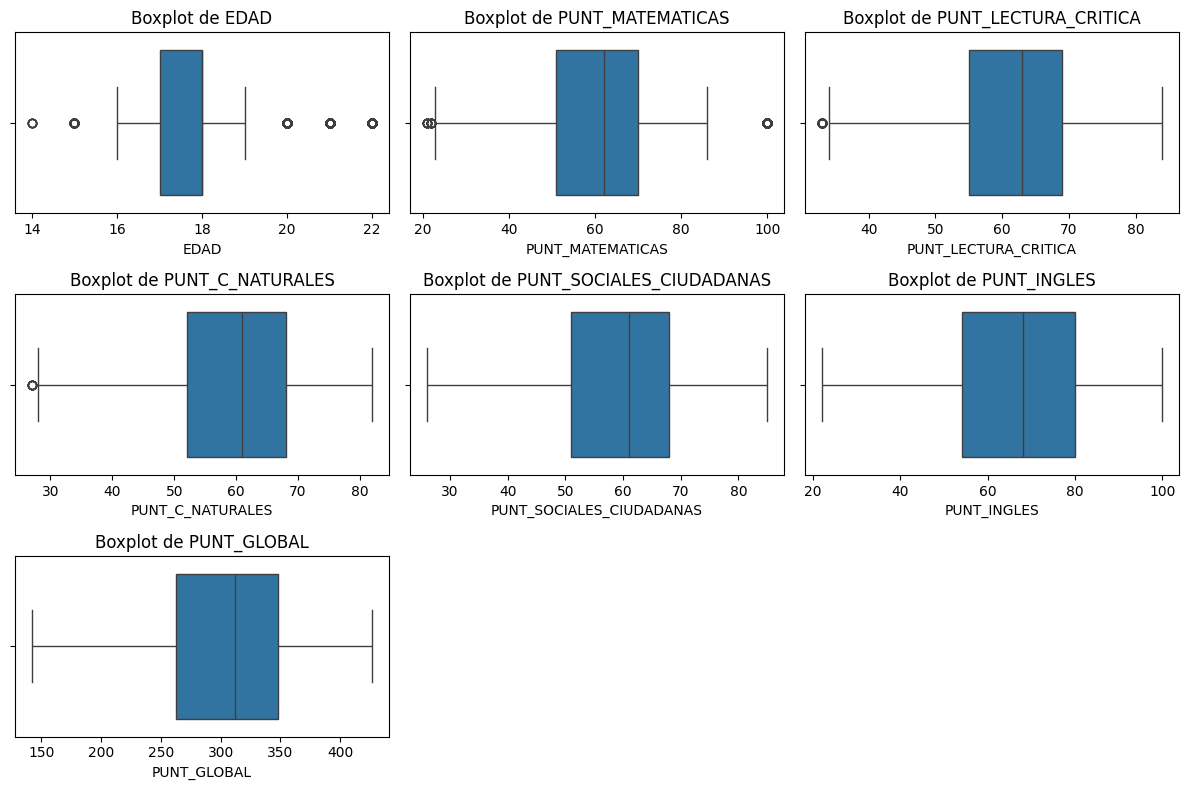

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumo que tienes df_sub con los datos originales SIN imputar aún

# 1. Análisis de valores faltantes iniciales
print("Valores faltantes por variable antes de imputación:")
faltantes = df_final.isnull().sum()
print(faltantes)

# --- Suponiendo que ahora tienes df_final, dataset limpio ya imputado y codificado ---

# 2. Estadísticas descriptivas del dataset limpio (variables numéricas y categóricas)
print("\nEstadísticas descriptivas de variables numéricas:")
print(df_final.describe())

# Para variables categóricas antes de codificación, puedes hacer algo así en df_sub (limpio pero sin one-hot):
print("\nFrecuencias de variables categóricas (antes de codificar):")
for col in cat_vars:
    print(f"\nVariable: {col}")
    print(df_sub[col].value_counts().head(10))  # muestra top 10 categorías

# 3. Detección básica de outliers en variables numéricas (edad y puntajes)
variables_numericas = ['EDAD', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 
                      'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']

plt.figure(figsize=(12,8))
for i, var in enumerate(variables_numericas, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df_final[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()


In [173]:
desc_stats = df_final[num_vars].describe().T
desc_stats

,count,mean,std,min,25%,50%,75%,max
EDAD,30134.0,17.843731,1.030790,14.0,17.0,18.0,18.0,22.0
PUNT_MATEMATICAS,30134.0,60.446240,13.246593,21.0,51.0,62.0,70.0,100.0
PUNT_LECTURA_CRITICA,30134.0,61.859859,10.029193,33.0,55.0,63.0,69.0,84.0
PUNT_C_NATURALES,30134.0,59.540287,11.427404,27.0,52.0,61.0,68.0,82.0
PUNT_SOCIALES_CIUDADANAS,30134.0,59.085684,12.267087,26.0,51.0,61.0,68.0,85.0
PUNT_INGLES,30134.0,66.195029,16.097953,22.0,54.0,68.0,80.0,100.0
PUNT_GLOBAL,30134.0,303.457656,55.602514,142.0,263.0,312.0,348.0,427.0
